<a href="https://colab.research.google.com/github/AkshataAhire/Insurance/blob/main/Copy_of_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                              **Insurance Risk Analysis Using Machine Learning Algorithms**

## **Introduction:**

---

The insurance industry can leverage machine learning to analyse vast volumes of data for better risk management and provide premium pricing targeted to the customer.
Therefore, we (the data team) hereby showcase the use of machine learning techniques over traditional risk quantification methods to predict the 'risk' of offering an insurance policy to a potential customer based on their personal and financial information ensuring that only 5% of the customers would claim their policy.

## **Goal:**


---
The goal is to understand the 'RISK PROFILE' of a potential customer basis their personal and financial information to determine how to price products. A higher risk means a higher chance of the customer making a claim within a year of purchasing the policy.



## **Significance:**

---



Hiscox offers various insurance cover, however, I have chosen Hiscox Home Insurance as their buildings and contents insurance is an award-winning service.
We have used synthesised data consisting of 10,000 records with 40 attributes for each record for analysis.



## **Data Code**

In [89]:
# importing libraries
import pandas as pd                                 #pandas library is used for data manipulation and analysis
import matplotlib.pyplot as plt                     #imported matplotlib and seaborn for data visualisation
import seaborn as sns
from sklearn.impute import SimpleImputer                          #imputer to replace missing values
import numpy as np                                                #numpy to handle arrays

from sklearn.model_selection import train_test_split              #libraries for data modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
#data is stored in the variable Hiscox
Hiscox = pd.read_excel('InsuranceData.xlsx')
Hiscox

***Data manipulation: Checking for duplicate records***

In [4]:
#checking and displaying the duplicate records
duplicates = Hiscox[Hiscox.duplicated()]
duplicates

,Id,Location,Phone number,Gender,Age,Education level,Marital status,No of dependents,Occupation,Income,...,Do you have any security systems?,Property left empty for long periods? (Over 60 days),Rebuild costs,Include content in Home Insurance,"Is value of all home content more than £1,00,000?",Do you want to include home content in home insurance?,Do you want any additional cover for the content?,Want to add a joint policyholder,Refused/cancelled/declined insurance,Claim status
6,10650,Town,9529236402,Male,61,High School,Divorced,3.0,Employment,117752,...,Yes,No,19435,No,No,Yes,No,Yes,Yes,1
7,75421,Countryside,9741884502,Female,50,Masters,Divorced,2.0,Business,96381,...,Yes,Yes,15806,No,Yes,Yes,Yes,Yes,Yes,0
8,79749,City,9560938377,Male,28,High School,Married,2.0,Business,59464,...,Yes,No,19093,Yes,Yes,No,No,No,No,1
9,15458,Town,8845269889,Female,52,School leaver,Divorced,3.0,Business,112594,...,Yes,Yes,15962,Yes,No,No,Yes,No,No,0
10,25686,City,9002476860,Male,58,School leaver,Single,1.0,Business,47068,...,No,Yes,17133,No,No,No,Yes,No,Yes,0
11,65580,Countryside,9826623870,Male,51,Bachelors,Divorced,2.0,Business,60753,...,Yes,No,15466,No,Yes,Yes,Yes,Yes,No,1
10006,11868,City,8306246001,Male,61,Masters,Single,2.0,Business,57722,...,No,Yes,18694,Yes,No,Yes,Yes,Yes,Yes,0
10007,2347,City,9358244447,Female,49,Masters,Single,3.0,Business,111796,...,Yes,No,17061,Yes,No,No,No,Yes,Yes,1
10008,46391,Countryside,9305014964,Female,71,Masters,Married,1.0,Retired,75509,...,No,Yes,15429,No,No,Yes,Yes,No,Yes,0
10009,27457,City,9618696625,Female,34,School leaver,Single,3.0,Business,86877,...,Yes,Yes,17848,Yes,Yes,Yes,No,No,No,0


In [5]:
#deleting the duplicate records
Hiscoxdata = Hiscox.drop_duplicates()

In [ ]:
#data without any duplicates
Hiscoxdata

***Data manipulation: Checking for missing values***

In [7]:
nullvalues = Hiscoxdata.isnull().sum()
print(nullvalues)

Id                                                                                0
Location                                                                          0
Phone number                                                                      0
Gender                                                                            0
Age                                                                               0
Education level                                                                   0
Marital status                                                                    0
No of dependents                                                                 29
Occupation                                                                        0
Income                                                                            0
Credit score                                                                     21
You & your immediate family reside in the UK?                               

***Replacing missing values of 'No of dependants' by mean with an imputer***

In [8]:
#replacing the missing values for column 'No of dependents'
dependent_values = Hiscoxdata['No of dependents']

#converting 1D data into 2D
dependent_values_2d = dependent_values.values.reshape(-1, 1)
print(dependent_values_2d)

[[3.]
 [2.]
 [2.]
 ...
 [3.]
 [3.]
 [1.]]


In [9]:
#replacing the data with mean as the data is uniform
imputer = SimpleImputer(strategy='mean')
imputer.fit(dependent_values_2d)
imputed_data = imputer.transform(dependent_values_2d)
print(imputed_data)

[[3.]
 [2.]
 [2.]
 ...
 [3.]
 [3.]
 [1.]]


In [ ]:
#converting 2d data into 1D
array_2d = np.array(imputed_data)
array_1d_flatten = array_2d.flatten()
dependent = pd.DataFrame(array_1d_flatten)

#changing the datatype from float to integer
dependentdata = dependent.astype(int)
dependentdata

In [20]:
#checking for missing values
print(dependentdata.isnull().sum())

0    0
dtype: int64


In [32]:
#replacing imputed dependant values into the main Hiscoxdata
Hiscoxdata_df = pd.DataFrame(Hiscoxdata)
Hiscoxdata_df['No of dependents'] = dependentdata[0].values
Hiscoxdata_df.isnull().sum()

Id                                                                                0
Location                                                                          0
Phone number                                                                      0
Gender                                                                            0
Age                                                                               0
Education level                                                                   0
Marital status                                                                    0
No of dependents                                                                  0
Occupation                                                                        0
Income                                                                            0
Credit score                                                                     21
You & your immediate family reside in the UK?                               

***Replacing missing values of 'Credit score' by median with an imputer***

In [34]:
#replacing the missing values for column 'Credit score'
credit_values = Hiscoxdata['Credit score']

#converting 1D data into 2D
credit_values_2d = credit_values.values.reshape(-1, 1)
print(credit_values_2d)

[[ 2.]
 [10.]
 [ 2.]
 ...
 [ 9.]
 [ 8.]
 [10.]]


In [35]:
#replacing the missing value of the Credit score with the median when there are outliers, by locating the centre value
imputer1 = SimpleImputer(strategy='median')
imputer1.fit(credit_values_2d)
imputed_data1 = imputer1.transform(credit_values_2d)
print(imputed_data1)

[[ 2.]
 [10.]
 [ 2.]
 ...
 [ 9.]
 [ 8.]
 [10.]]


In [36]:
#converting 2d data into 1D
array_2d1 = np.array(imputed_data1)
array_1d_flatten1 = array_2d1.flatten()
credit = pd.DataFrame(array_1d_flatten1)

#changing the datatype from float to integer
creditdata = credit.astype(int)
creditdata

,0
0,2
1,10
2,2
3,1
4,5
...,...
9995,7
9996,8
9997,9
9998,8


In [37]:
#checking for missing values
print(creditdata.isnull().sum())

0    0
dtype: int64


In [38]:
#replacing imputed 'Credit scores' into the main Hiscoxdata
Hiscoxdata_df = pd.DataFrame(Hiscoxdata)
Hiscoxdata_df['Credit score'] = creditdata[0].values
Hiscoxdata_df.isnull().sum()

Id                                                                               0
Location                                                                         0
Phone number                                                                     0
Gender                                                                           0
Age                                                                              0
Education level                                                                  0
Marital status                                                                   0
No of dependents                                                                 0
Occupation                                                                       0
Income                                                                           0
Credit score                                                                     0
You & your immediate family reside in the UK?                                    0
Home

***Checking for outliers on attributes 'Income' and 'Home value'***

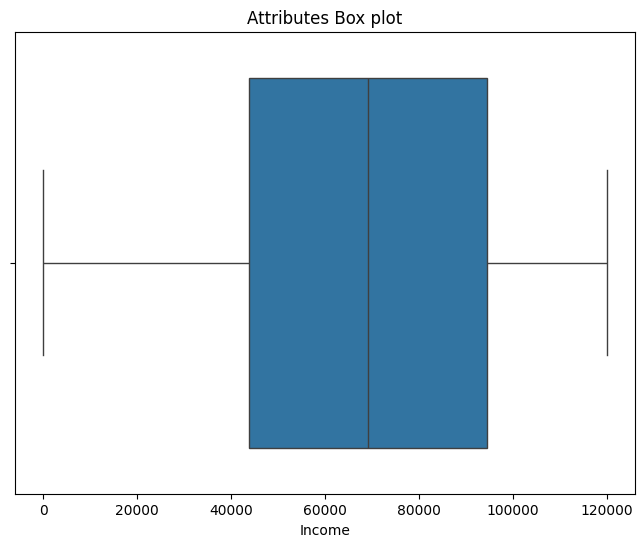

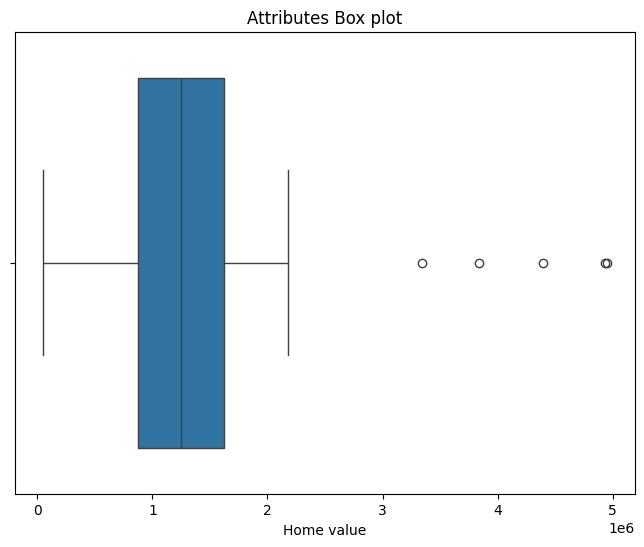

In [41]:
#Creating box plots to check outliers for Income and Home value attributes
attribute_boxplot = ['Income','Home value']

for attribute in attribute_boxplot:
  plt.figure(figsize=(8,6))
  plt.title('Attributes Box plot')
  sns.boxplot(x=Hiscoxdata_df[attribute])
  plt.show()

In [43]:
#Checking the outlier data for attribute 'Home value'

#Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(Hiscoxdata_df['Home value'], 25)
Q3 = np.percentile(Hiscoxdata_df['Home value'], 75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in Hiscoxdata_df['Home value'] if x < lower_bound or x > upper_bound]
print("Identified outliers in 'Home value' attribute:", outliers)

Identified outliers: [3342628, 4946892, 4928687, 3837997, 4396499]


In [48]:
# Define a function to identify and remove outliers

def remove_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define lower and upper bounds for identifying outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

# Remove outliers from column 'Home value'
data_filtered = remove_outliers(Hiscoxdata_df, 'Home value')

# Display the DataFrame without outliers in 'Home value'
HiscoxFinal = pd.DataFrame(data_filtered)

## **Data Modelling - Random Forest classification model**

In [99]:
print(HiscoxFinal.columns)

Index(['Id ', 'Location', 'Phone number', 'Gender', 'Age', 'Education level',
       'Marital status', 'No of dependents', 'Occupation', 'Income',
       'Credit score', 'You & your immediate family reside in the UK?',
       'Homeownership status', 'Home value more than £500,000?', 'Home value',
       'Is this the main residence',
       'Made more than 3 home insurance claims in the last 5 years?',
       'Did you file a lawsuit against an Insurance company in the past?',
       'Property suffered any damage(landslip, subsidence or heave?)',
       'Property ever suffered from flooding or its in an area under a flood warning?',
       'Insured ever been bankrup/debit relief order/criminal offence?',
       'Type of property', 'Standard construction, stones, bricks and tiles?',
       'Roof is flat or pitched?', 'Listed building?', 'Number of bedroom',
       'Age of home', 'Do you have smoke alarm?',
       'Do you have locks on doors & windows?',
       'Do you have any security sy

In [58]:
# Perform one-hot encoding for multiple categorical columns to set dummy numerical values for categorical data
one_hot_encoded = pd.get_dummies(HiscoxFinal, columns=['Location', 'Gender', 'Education level',
       'Marital status', 'Occupation', 'You & your immediate family reside in the UK?',
       'Homeownership status', 'Home value more than £500,000?',
       'Is this the main residence',
       'Made more than 3 home insurance claims in the last 5 years?',
       'Did you file a lawsuit against an Insurance company in the past?',
       'Property suffered any damage(landslip, subsidence or heave?)',
       'Property ever suffered from flooding or its in an area under a flood warning?',
       'Insured ever been bankrup/debit relief order/criminal offence?',
       'Type of property', 'Standard construction, stones, bricks and tiles?',
       'Roof is flat or pitched?', 'Listed building?', 'Do you have smoke alarm?',
       'Do you have locks on doors & windows?',
       'Do you have any security systems?',
       'Property left empty for long periods? (Over 60 days)',
       'Include content in Home Insurance',
       'Is value of all home content more than £1,00,000?',
       'Do you want to include home content in home insurance?',
       'Do you want any additional cover for the content?',
       'Want to add a joint policyholder',
       'Refused/cancelled/declined insurance'])

HiscoxFinal_df_copy = pd.DataFrame(one_hot_encoded)

In [65]:
#deleting the null values from the dataset
HiscoxFinal_df = HiscoxFinal_df_copy.dropna(thresh=HiscoxFinal_df_copy.shape[1]-1)
HiscoxFinal_df1 = HiscoxFinal_df.dropna()
pd.DataFrame(HiscoxFinal_df1.isnull().sum())

,0
Id,0
Phone number,0
Age,0
No of dependents,0
Income,0
...,...
Do you want any additional cover for the content?_Yes,0
Want to add a joint policyholder_No,0
Want to add a joint policyholder_Yes,0
Refused/cancelled/declined insurance_No,0


***Using Random Forest ML algorithm to train the data and evaluate the model on the parameter of Accuracy***

In [69]:
#splitting data into features and target variable
X = HiscoxFinal_df1.drop('Claim status ', axis=1)
y = HiscoxFinal_df1['Claim status ']

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#feature selection using Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

#select features based on feature importance
sfm = SelectFromModel(clf, threshold=0.1)
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

#training a classifier on selected features
clf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
clf_selected.fit(X_train_selected, y_train)

#evaluating the model
y_pred = clf_selected.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of training model:", accuracy)

Accuracy of training model: 0.9709854927463731


In [74]:
#trying to test the model's accuracy by checking it on random data and finding the mean of the accuracies

#storing train and test accuracies
train_accuracies = []
test_accuracies = []

#number of iterations to test the model's accuracy
num_iterations = 10

for i in range(num_iterations):
    #splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    #train the random forest classifier
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train, y_train)

    #evaluating the model's accuracy on training and testing sets
    train_accuracy = accuracy_score(y_train, rf_classifier.predict(X_train))
    test_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))

    #appending the accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

#converting the lists to numpy arrays for easier manipulation
train_accuracies = np.array(train_accuracies)
test_accuracies = np.array(test_accuracies)

# Print the average train and test accuracies
print("Average Train Accuracy for 10 iterations:", np.mean(train_accuracies))
print("Average Test Accuracy for 10 iterations:", np.mean(test_accuracies))

Average Train Accuracy: 1.0
Average Test Accuracy: 0.9986993496748374


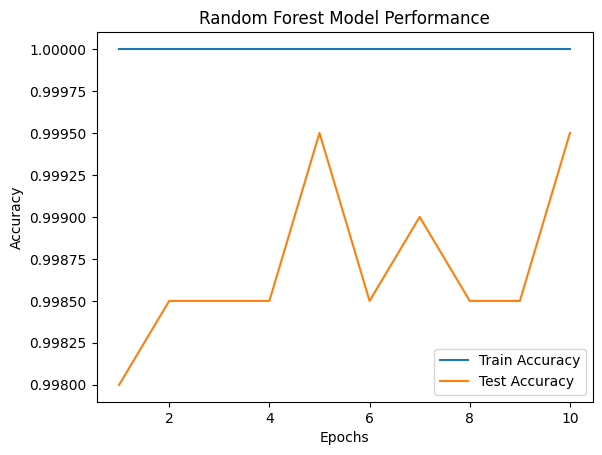

In [79]:
#plotting the random forest model performance

epochs = range(1, 11)

# Plotting the performance metrics
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Random Forest Model Performance')
plt.legend()

# Displaying the plot
plt.show()#

In [78]:
# Precision - Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Step 4: Train the model
rf_classifier.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf_classifier.predict(X_test)

# Step 6: Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Precision:", precision)

Precision: 0.9995002831906359


## **Data Modelling - Logistic Regression model**

In [84]:
#splitting data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

#logistic regression model
logistic_model = LogisticRegression()

#training the model on the training data
logistic_model.fit(X1_train, y1_train)

#predictions on the testing data
y1_pred = logistic_model.predict(X1_test)

#evaluating the model
logistic_accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy of LogisticRegressionModel:", logistic_accuracy)

#detailed evaluation metrics
print()
print(classification_report(y1_test, y1_pred, zero_division=0))

Accuracy of LogisticRegressionModel: 0.5312656328164082

              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1062
           1       0.00      0.00      0.00       937

    accuracy                           0.53      1999
   macro avg       0.27      0.50      0.35      1999
weighted avg       0.28      0.53      0.37      1999



## **Data Modelling - Decision Tree classification model**

In [94]:
#spilitting the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_classifier = DecisionTreeClassifier(random_state=42)

#train the model
decision_classifier.fit(X2_train, y2_train)

#predictions
y2_pred = decision_classifier.predict(X2_test)

#evaluating the model
decision_accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy of decision tree model:", decision_accuracy)

Accuracy of decision tree model: 1.0


In [95]:
#trying to check the model's accuracy on various batch test data

#store train and test accuracies
train2_accuracies = []
test2_accuracies = []

#number of iterations
num_iterations = 10

for i in range(num_iterations):
    #split the dataset into training and testing sets
    X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=i)

    #train the decision tree classifier
    decision2_classifier = DecisionTreeClassifier(random_state=42)
    decision2_classifier.fit(X_train, y_train)

    #make predictions on training and testing data
    y2_train_pred = decision2_classifier.predict(X2_train)
    y2_test_pred = decision2_classifier.predict(X2_test)

    #compute train and test accuracies
    train2_accuracy = accuracy_score(y2_train, y2_train_pred)
    test2_accuracy = accuracy_score(y2_test, y2_test_pred)

    #append the accuracies to the lists
    train2_accuracies.append(train2_accuracy)
    test2_accuracies.append(test2_accuracy)

#convert the lists to arrays for easier manipulation
train2_accuracies = np.array(train2_accuracies)
test2_accuracies = np.array(test2_accuracies)

#print the average train and test accuracies
print("Average Train Accuracy of decision tree model:", np.mean(train2_accuracies))
print("Average Test Accuracy of decision tree model:", np.mean(test2_accuracies))

Average Train Accuracy of decision tree model: 1.0
Average Test Accuracy of decision tree model: 1.0


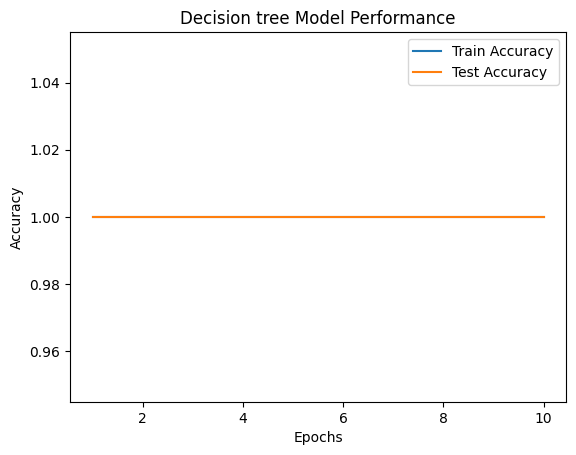

In [93]:
#plotting the decision tree model performance

epochs = range(1, 11)

# Plotting the performance metrics
plt.plot(epochs, train2_accuracies, label='Train Accuracy')
plt.plot(epochs, test2_accuracies, label='Test Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Decision tree Model Performance')
plt.legend()

# Displaying the plot
plt.show()#

In [90]:
#the accuracy is 1.0 therefore crosschecking on different parameters

decision_precision = precision_score(y2_test, y2_pred, average='weighted')
print("Precision of decision tree:", decision_precision)
decision_recall = recall_score(y2_test, y2_pred, average='weighted')
print("Recall of decision tree:", decision_recall)
decision_f1 = f1_score(y2_test, y2_pred, average='weighted')
print("F1-score of decision tree:", decision_f1)

Precision of decision tree: 1.0
Recall of decision tree: 1.0
F1-score of decision tree: 1.0


### *Goal to receive only 5% policy claims*

In [97]:
#predict probabilities
proba_predictions = decision_classifier.predict_proba(X)

#extract probabilities for positive class (claim)
claim_probabilities = proba_predictions[:, 1]

#set the desired claim rate threshold
desired_claim_rate = 0.05

#find the threshold corresponding to the desired claim rate
threshold = np.percentile(claim_probabilities, (1 - desired_claim_rate) * 100)

#classify policyholders based on the adjusted threshold
claim_predictions = (claim_probabilities >= threshold).astype(int)

In [114]:
#trying to evaluate the performance basis a few metrics
dprecision = precision_score(y2_test, y_pred)
print("Precision for 5% claim rate:" , dprecision)

drecall = recall_score(y2_test, y_pred)
print("Recall for 5% claim rate:" , drecall)

df1 = f1_score(y2_test, y_pred)
print("F1 score for 5% claim rate:" , df1)

Precision for 5% claim rate: 0.4690831556503198
Recall for 5% claim rate: 0.4777415852334419
F1 score for 5% claim rate: 0.47337278106508873


## **Questions:**

---



What are the considerations for ensuring the business can leverage Machine Learning?


* High quality data - We have to ensure that high-quality data with cleanliness and relevance is available for training and testing ML models.
* Cloud platform/Infrastructure - We need a storage or a platform to handle large volumes of data.
* Defined process - There has to be a process in place for developing, deploying and maintaining ML models.
* Efficiency - Monitor model performance and optimize
efficiency.
* Integration with the business - Integrate Machine Learning into existing processes.
* Collaborate with other teams - Speak with other teams to identify the issues and provide ML solutions/initiatives to the business.
* Knowledge sharing - Knowledge sharing with other teams is very important to improve the ML process and make them aware too.





What are the steps you would take to provide ML into the business?

*   Identify the business goals- Understand the business objectives, goals, challenges and think of the ways Machine Learning could address and achieve business objectives.
*   Define use cases - Work on the use cases that the outcomes of the ML projects are aligned with business objectives.
*   Data preparation and manipulation - Collect the data from internal databases or external sources depending on the requirements, clean, process and ensure it is ready for Machine learning model training.
*   Model selection and training - Choose the right ML algorithms, train model
*   Model evaluation - Evaluate the performance of the model basis metrics like accuracy, precision, recall, F1-score or area under the ROC curve.
*   Deployment and Integration - Deploy the trained models to generate predictions or insights.
*   Share knowledge and support - Provide support to other teams




---









Which traditional teams in a business would you need to speak to?

*   Claims team
*   Finance team
*   Underwriters
*   Stakeholders
*   Legal and compliance team








What is the scope and out of scope for your responsibility?

*   Data Collection: Collecting data from various sources, internal and external datasets.
*   Data Cleaning and Preprocessing: Cleaning and preprocessing raw data to remove duplicates, missing values and outliers and ensure quality.
*   Data Analysis: Exploring and analysing the data to understand its patterns and relationships.
*   Model Development: Building, training, and evaluating machine learning models to solve specific business problems or make predictions.
Model Deployment: Deploying machine learning models to generate predictions or insights in real time.
Model Monitoring and Maintenance: Monitoring the performance of deployed models and updating and maintaining models as needed.
*   Data Visualisation: Creating visualisations and reports to communicate findings and insights from data analysis and modeling to stakeholders.
*   Collaboration with other teams: Collaborating with stakeholders from different departments, such as business, engineering, and product teams, to understand requirements and deliver solutions that meet business needs.

Additionally, having worked as a DevOps Engineer more than happy to take care of the ETL pipeline.

Out of Scope responsibilities according to me:

*  Data Entry: Manual data entry or data collection tasks.
*  Project Management: Overseeing project timelines, budgets, and resources, including tasks such as project planning, coordination, and stakeholder management.
*  Business Strategy and Decision-making: Making high-level strategic decisions or setting business priorities, which are typically the responsibility of executives and business leaders.
*  Legal and Compliance: Ensuring compliance with data privacy regulations, intellectual property laws, and other legal requirements, which may involve legal expertise.
*  Customer Support: Providing customer support which are typically handled by customer service.



## **Conclusion:**


---

Machine Learning can help businesses in various aspects:

*   Risk Assessment
*   Identify potential frauds
*   Claim processing
*   Predictions and Forecasting
*   Price optimisation
*   List item

Overall, machine learning offers insurance companies valuable tools and techniques to enhance operational efficiency, mitigate risks, improve customer satisfaction, and drive business growth in an increasingly competitive marketplace.





